In [88]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [89]:
np.random.seed(42)

In [96]:
# generate random dataset
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
class1 = np.random.normal(loc=[2, 0], scale=[0.5, 2], size=(50, 2))
class2 = np.random.normal(loc=[-2, 0], scale=[0.5, 2], size=(50, 2))

In [91]:

# create copy of class 1 and shift it to the left
class_1_moved = class1.copy()
class_1_moved[:, 0] = class_1_moved[:, 0] - 3


In [92]:
def annotation_line(ax, xmin, xmax, y, text, ytext=0, linecolor='black', textcolor='black', linewidth=1, fontsize=12): # https://stackoverflow.com/questions/38677467/how-to-annotate-a-range-of-the-x-axis-in-matplotlib/38677732#38677732
    # Drawing the line with arrow tips
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
                arrowprops={'arrowstyle': '|-|', 'color': linecolor, 'linewidth': linewidth})
    # Drawing the line without arrow tips (just the line)
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
                arrowprops={'arrowstyle': '<->', 'color': linecolor, 'linewidth': linewidth})
    # Calculating the center for the text
    xcenter = xmin + (xmax - xmin) / 2
    if ytext == 0:
        ytext = y + (ax.get_ylim()[1] - ax.get_ylim()[0]) / 20
    # Adding the text with the specified color
    ax.text(xcenter, ytext, text, ha='center', va='center', fontsize=fontsize, color=textcolor)


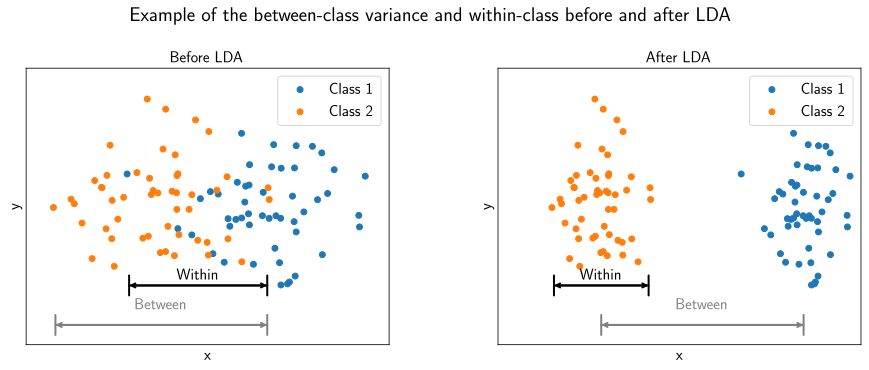

In [93]:
fig, axs1 = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Example of the between-class variance and within-class before and after LDA', fontsize=20, y=1.05)
axs1[0].scatter(class_1_moved[:, 0], class1[:, 1], label='Class 1')
axs1[0].scatter(class2[:, 0], class2[:, 1], label='Class 2')
axs1[0].legend()
axs1[0].set_title('Before LDA', fontsize=16)
axs1[0].set_xlabel('x')
axs1[0].set_ylabel('y')
axs1[0].set_xlim(-3.2, 0)
axs1[0].set_ylim(-7, 7)
axs1[0].set_xticks([])
axs1[0].set_yticks([])

# annotation function from stackoverflow
annotation_line( ax=axs1[0], text='Within', xmin=-2.3098725520448724, xmax=-1.0569070493947348,
                    y=-4, ytext=-3.5, linewidth=2, linecolor='black', fontsize=16, textcolor='black')
annotation_line( ax=axs1[0], text='Between', xmin=class2[:, 0].min()
, xmax=-1.0569070493947348,
                    y=-6, ytext=-5, linewidth=2, linecolor='grey', fontsize=16, textcolor='grey')

axs1[1].scatter(class1[:, 0], class1[:, 1], label='Class 1')
axs1[1].scatter(class2[:, 0], class2[:, 1], label='Class 2')
axs1[1].legend()
axs1[1].set_title('After LDA', fontsize=16)
axs1[1].set_xlabel('x')
axs1[1].set_ylabel('y')
axs1[1].set_xlim(-4, 3)
axs1[1].set_ylim(-7, 7)
axs1[1].set_xticks([])
axs1[1].set_yticks([])

# annotation function from stackoverflow
annotation_line( ax=axs1[1], text='Within', xmin=-2.9593856076495206, xmax=-1.0569070493947348,
                    y=-4, ytext=-3.5, linewidth=2, linecolor='black', fontsize=16, textcolor='black')
annotation_line( ax=axs1[1], text='Between', xmin=-2.047726439288684
, xmax=1.932162184500294,
                    y=-6, ytext=-5, linewidth=2, linecolor='grey', fontsize=16, textcolor='grey')
fig.subplots_adjust(wspace=0.3)
plt.savefig('lda_between_within.png', dpi=300, bbox_inches='tight')
plt.show()